In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load employment outlook data
df = pd.read_csv('4. Economy/Data/fig_4.4.12.csv')

# Filter out "Overall" row
df_by_function = df[df['Function'] != 'Overall'].copy()

# Define categories
decrease_cats = ['Decrease by >20%', 'Decrease by 11–20%', 'Decrease by 3–10%']
increase_cats = ['Increase by 3–10%', 'Increase by 11–20%', 'Increase by >20%']

# Aggregate by function
functions = df_by_function['Function'].unique()
net_changes = {}

for func in functions:
    func_data = df_by_function[df_by_function['Function'] == func]
    decreases = -func_data[func_data['Response'].isin(decrease_cats)]['% of respondents'].sum()
    increases = func_data[func_data['Response'].isin(increase_cats)]['% of respondents'].sum()
    net = increases + decreases
    
    net_changes[func] = {
        'net': net,
        'increases': increases,
        'decreases': decreases
    }

# Sort by net change
sorted_funcs = sorted(net_changes.keys(), key=lambda x: net_changes[x]['net'])

# Print summary
print("EMPLOYMENT OUTLOOK BY FUNCTION (Net Change)")
print("="*70)
for func in sorted_funcs:
    net = net_changes[func]['net']
    inc = net_changes[func]['increases']
    dec = net_changes[func]['decreases']
    direction = "📈" if net > 0 else "📉" if net < 0 else "➡️"
    print(f"{func:<40} {direction} Net: {net:>+6.1%}")



EMPLOYMENT OUTLOOK BY FUNCTION (Net Change)
Human resources                          📉 Net: -31.0%
Service operations                       📉 Net: -27.0%
Supply chain/ inventory management       📉 Net: -18.0%
Risk, legal, and compliance              📉 Net: -14.0%
Manufacturing                            📉 Net: -13.0%
Marketing and sales                      📉 Net:  -9.0%
Strategy and corporate finance           📉 Net:  -1.0%
Software engineering                     📈 Net:  +4.0%
Product and/or service development       📈 Net: +11.0%
IT                                       📈 Net: +16.0%


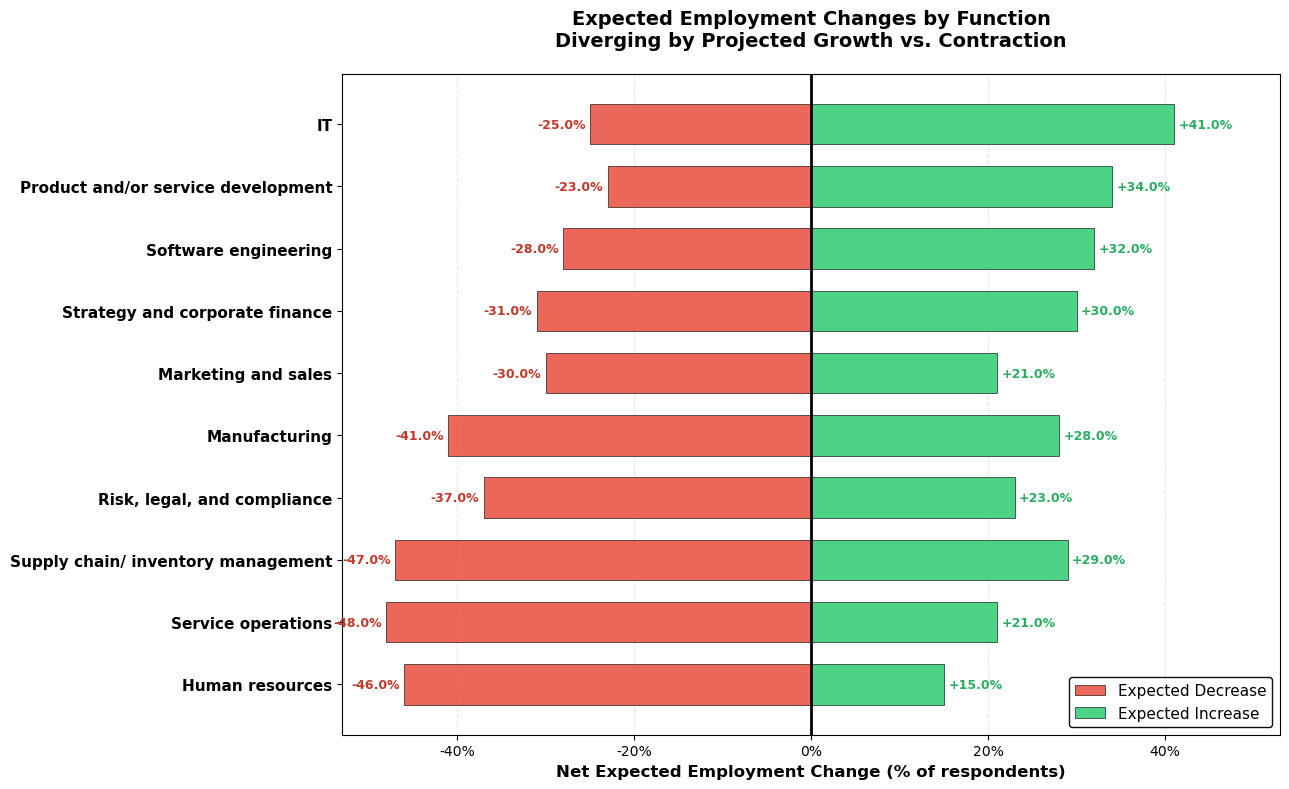


📊 KEY INSIGHTS:
----------------------------------------------------------------------
Highest growth expected: IT (+16.0%)
Largest decline expected: Human resources (-31.0%)
Functions expecting net growth: 3
Functions expecting net decline: 7


In [3]:
# Create diverging bar chart
fig, ax = plt.subplots(figsize=(13, 8))

functions_sorted = list(sorted_funcs)
y_pos = np.arange(len(functions_sorted))
colors_inc = '#2ecc71'  # Green for increases
colors_dec = '#e74c3c'  # Red for decreases

# Prepare data
increases = [net_changes[f]['increases'] for f in functions_sorted]
decreases = [net_changes[f]['decreases'] for f in functions_sorted]

# Plot decreases (to the left, negative)
ax.barh(y_pos, decreases, height=0.65, label='Expected Decrease', color=colors_dec, alpha=0.85, edgecolor='black', linewidth=0.5)

# Plot increases (to the right, positive)
ax.barh(y_pos, increases, height=0.65, label='Expected Increase', color=colors_inc, alpha=0.85, edgecolor='black', linewidth=0.5)

# Add center line at zero
ax.axvline(x=0, color='black', linewidth=2, linestyle='-', zorder=3)

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(functions_sorted, fontsize=11, fontweight='bold')
ax.set_xlabel('Net Expected Employment Change (% of respondents)', fontweight='bold', fontsize=12)
ax.set_title('Expected Employment Changes by Function\nDiverging by Projected Growth vs. Contraction', 
             fontweight='bold', fontsize=14, pad=20)
ax.legend(loc='lower right', fontsize=11, framealpha=0.95, edgecolor='black')

# Add grid
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add value labels on bars
for i, func in enumerate(functions_sorted):
    inc_val = net_changes[func]['increases']
    dec_val = net_changes[func]['decreases']
    
    # Label for increases (right side)
    if inc_val > 0.01:
        ax.text(inc_val + 0.005, i, f'+{inc_val:.1%}', va='center', fontsize=9, fontweight='bold', color='#27ae60')
    
    # Label for decreases (left side)
    if dec_val < -0.01:
        ax.text(dec_val - 0.005, i, f'{dec_val:.1%}', va='center', ha='right', fontsize=9, fontweight='bold', color='#c0392b')

# Set x-axis limits for symmetry
max_val = max(max(abs(x) for x in increases), max(abs(x) for x in decreases))
ax.set_xlim(-max_val - 0.05, max_val + 0.05)

# Format x-axis as percentages
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.tight_layout()
plt.show()

print("\n📊 KEY INSIGHTS:")
print("-" * 70)
net_growth = [net_changes[f]['net'] for f in functions_sorted]
print(f"Highest growth expected: {sorted_funcs[-1]} ({net_changes[sorted_funcs[-1]]['net']:+.1%})")
print(f"Largest decline expected: {sorted_funcs[0]} ({net_changes[sorted_funcs[0]]['net']:+.1%})")
print(f"Functions expecting net growth: {sum(1 for f in sorted_funcs if net_changes[f]['net'] > 0)}")
print(f"Functions expecting net decline: {sum(1 for f in sorted_funcs if net_changes[f]['net'] < 0)}")


# AI Impact on Jobs & Economy: Comprehensive Analysis
## 2025 AI Index Report Data

**Extended Edition**: Includes detailed job market analysis, skills demand, occupational risk assessment, and geographic distribution.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Data path
data_path = Path('/Users/matthewgrossman/Desktop/PUBLIC DATA_ 2025 AI Index Report/4. Economy/Data')
print("✓ Data loaded successfully")

✓ Data loaded successfully


## 1. Generative AI Skills Demand Explosion

In [5]:
# Load GenAI skills data
genai_skills_df = pd.read_csv(data_path / 'fig_4.2.5.csv')

print("Generative AI Skills Job Postings:")
print(genai_skills_df)
print(f"\nTotal GenAI job postings 2024: {genai_skills_df[genai_skills_df['Year'] == 2024]['Number of AI Job Postings'].sum():,.0f}")
print(f"Total GenAI job postings 2023: {genai_skills_df[genai_skills_df['Year'] == 2023]['Number of AI Job Postings'].sum():,.0f}")
growth = (genai_skills_df[genai_skills_df['Year'] == 2024]['Number of AI Job Postings'].sum() / 
          genai_skills_df[genai_skills_df['Year'] == 2023]['Number of AI Job Postings'].sum() - 1) * 100
print(f"Growth 2023→2024: {growth:.1f}%")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/matthewgrossman/Desktop/PUBLIC DATA_ 2025 AI Index Report/4. Economy/Data/fig_4.2.5.csv'

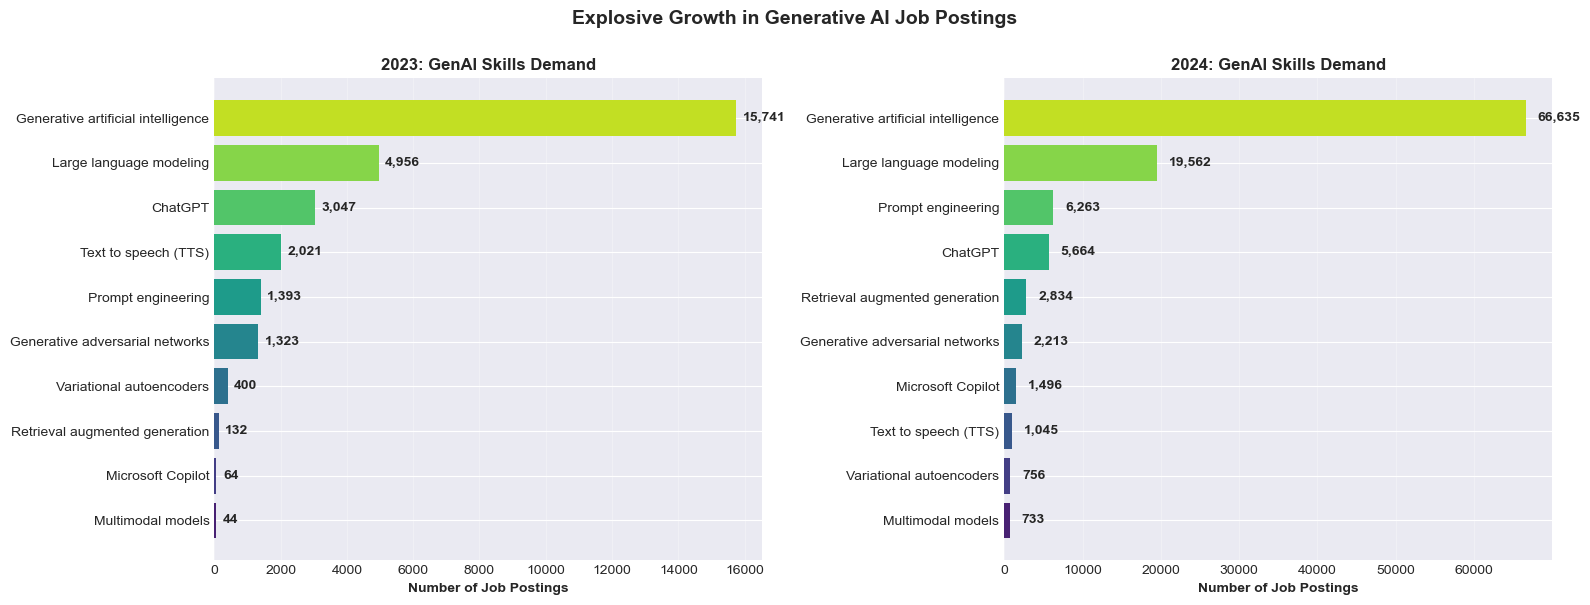


📈 Key Insights:
• ChatGPT skills: 3.0K → 5.7K (+87%)
• Prompt Engineering: 1.4K → 6.3K (+351%)
• Large Language Models: 5.0K → 19.6K (+295%)
• GenAI growth is dramatically outpacing traditional AI


In [ ]:
# Visualization: GenAI Skills Growth
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2023 data
data_2023 = genai_skills_df[genai_skills_df['Year'] == 2023].sort_values('Number of AI Job Postings', ascending=True)
ax1 = axes[0]
colors_2023 = sns.color_palette("viridis", len(data_2023))
ax1.barh(data_2023['Generative AI skill'], data_2023['Number of AI Job Postings'], color=colors_2023)
ax1.set_xlabel('Number of Job Postings', fontweight='bold')
ax1.set_title('2023: GenAI Skills Demand', fontweight='bold', fontsize=12)
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(data_2023['Number of AI Job Postings']):
    ax1.text(v + 200, i, f'{v:,.0f}', va='center', fontweight='bold')

# 2024 data
data_2024 = genai_skills_df[genai_skills_df['Year'] == 2024].sort_values('Number of AI Job Postings', ascending=True)
ax2 = axes[1]
colors_2024 = sns.color_palette("viridis", len(data_2024))
ax2.barh(data_2024['Generative AI skill'], data_2024['Number of AI Job Postings'], color=colors_2024)
ax2.set_xlabel('Number of Job Postings', fontweight='bold')
ax2.set_title('2024: GenAI Skills Demand', fontweight='bold', fontsize=12)
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(data_2024['Number of AI Job Postings']):
    ax2.text(v + 1500, i, f'{v:,.0f}', va='center', fontweight='bold')

plt.suptitle('Explosive Growth in Generative AI Job Postings', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n📈 Key Insights:")
print("• ChatGPT skills: 3.0K → 5.7K (+87%)")
print("• Prompt Engineering: 1.4K → 6.3K (+351%)")
print("• Large Language Models: 5.0K → 19.6K (+295%)")
print("• GenAI growth is dramatically outpacing traditional AI")

## 2. US Geographic Distribution of AI Jobs

In [ ]:
# Load US state-level AI jobs data
us_states_df = pd.read_csv(data_path / 'fig_4.2.10.csv')

# Convert percentage to float
us_states_df['pct'] = us_states_df['Percentage of US AI job postings'].str.rstrip('%').astype('float')

print("Top 15 States by AI Job Concentration:")
print(us_states_df.nlargest(15, 'pct')[['State code', 'Percentage of US AI job postings', 'pct']])

Top 15 States by AI Job Concentration:
   State code Percentage of US AI job postings    pct
4          CA                           15.70%  15.70
42         TX                            8.77%   8.77
31         NY                            5.76%   5.76
45         VA                            4.74%   4.74
46         WA                            4.72%   4.72
20         MA                            4.42%   4.42
12         IL                            3.97%   3.97
8          FL                            3.83%   3.83
9          GA                            3.08%   3.08
29         NJ                            2.96%   2.96
37         PA                            2.93%   2.93
32         NC                            2.87%   2.87
34         OH                            2.51%   2.51
5          CO                            2.42%   2.42
21         MI                            2.37%   2.37


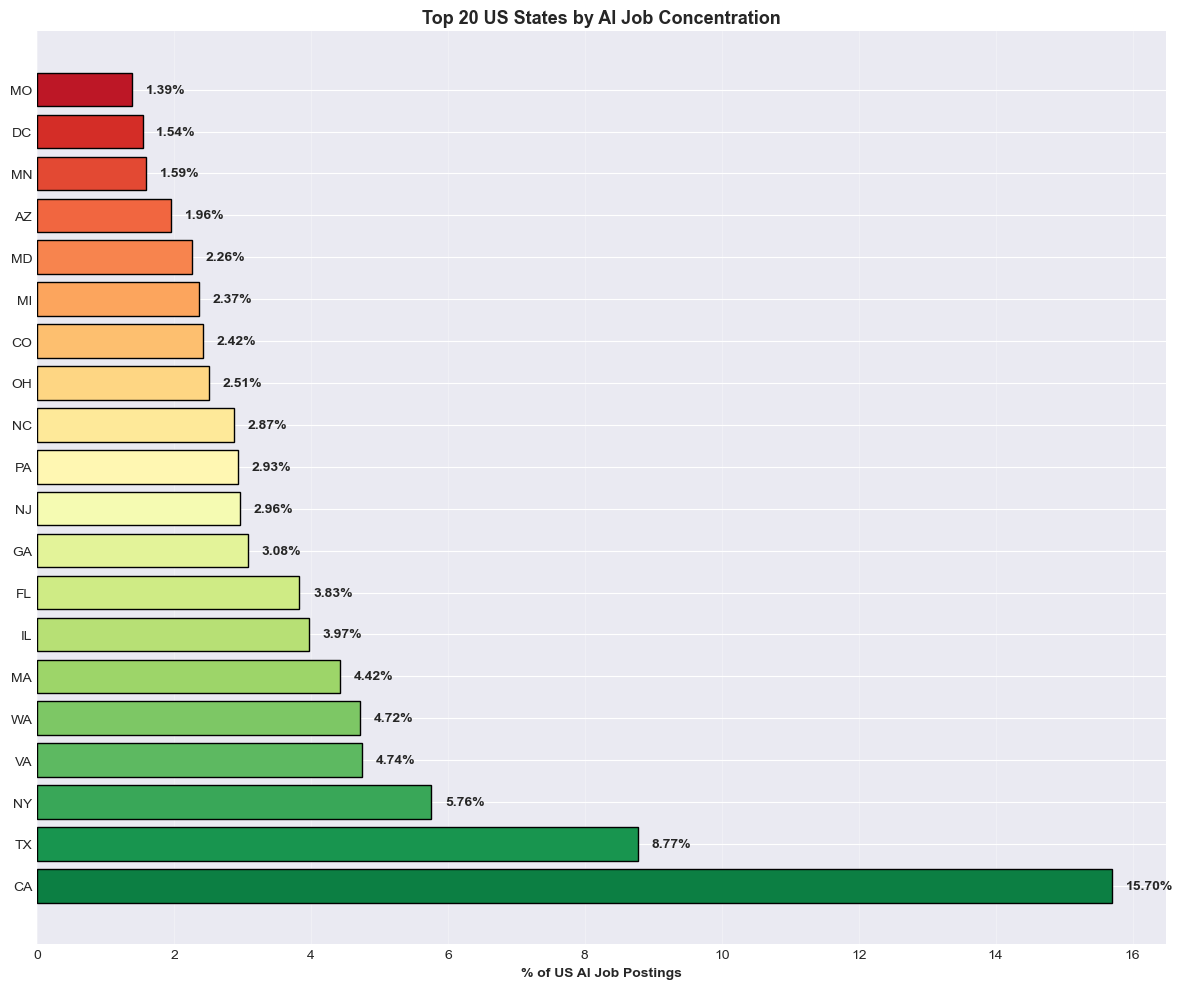


🌟 Top 5 States:
 CA:  15.70% - 15.70%
 TX:   8.77% - 8.77%
 NY:   5.76% - 5.76%
 VA:   4.74% - 4.74%
 WA:   4.72% - 4.72%

CA + TX + NY = 30.2% of all US AI jobs


In [ ]:
# Visualization: US AI Jobs by State
fig, ax = plt.subplots(figsize=(12, 10))

top_states = us_states_df.nlargest(20, 'pct')
colors_states = sns.color_palette("RdYlGn", len(top_states))

ax.barh(top_states['State code'], top_states['pct'], color=colors_states[::-1], edgecolor='black', linewidth=1)
ax.set_xlabel('% of US AI Job Postings', fontweight='bold')
ax.set_title('Top 20 US States by AI Job Concentration', fontweight='bold', fontsize=13)
ax.grid(axis='x', alpha=0.3)

for i, (state, pct) in enumerate(zip(top_states['State code'], top_states['pct'])):
    ax.text(pct + 0.2, i, f'{pct:.2f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🌟 Top 5 States:")
for idx, row in us_states_df.nlargest(5, 'pct').iterrows():
    print(f"{row['State code']:>3}: {row['pct']:>6.2f}% - {row['Percentage of US AI job postings']}")

print(f"\nCA + TX + NY = {us_states_df[us_states_df['State code'].isin(['CA', 'TX', 'NY'])]['pct'].sum():.1f}% of all US AI jobs")

## 3. Global AI Talent Penetration Rates

In [ ]:
# Load global AI talent penetration data
talent_penetration_df = pd.read_csv(data_path / 'fig_4.2.15.csv')
talent_penetration_df['Penetration'] = talent_penetration_df['Relative AI skill penetration rate, 2015-24'].astype('float')

print("Top 15 Countries by AI Talent Penetration (2015-2024):")
print(talent_penetration_df.nlargest(15, 'Penetration')[['Geographic area', 'Relative AI skill penetration rate, 2015-24']])

Top 15 Countries by AI Talent Penetration (2015-2024):
   Geographic area  Relative AI skill penetration rate, 2015-24
0    United States                                         2.63
1            India                                         2.51
2   United Kingdom                                         1.40
3          Germany                                         1.32
4           Brazil                                         1.32
5           Canada                                         1.30
6           France                                         1.23
7            Spain                                         1.10
8        Indonesia                                         1.04
9           Global                                         1.00
10       Australia                                         0.95
11          Turkey                                         0.94
12     Netherlands                                         0.92
13           Italy                               

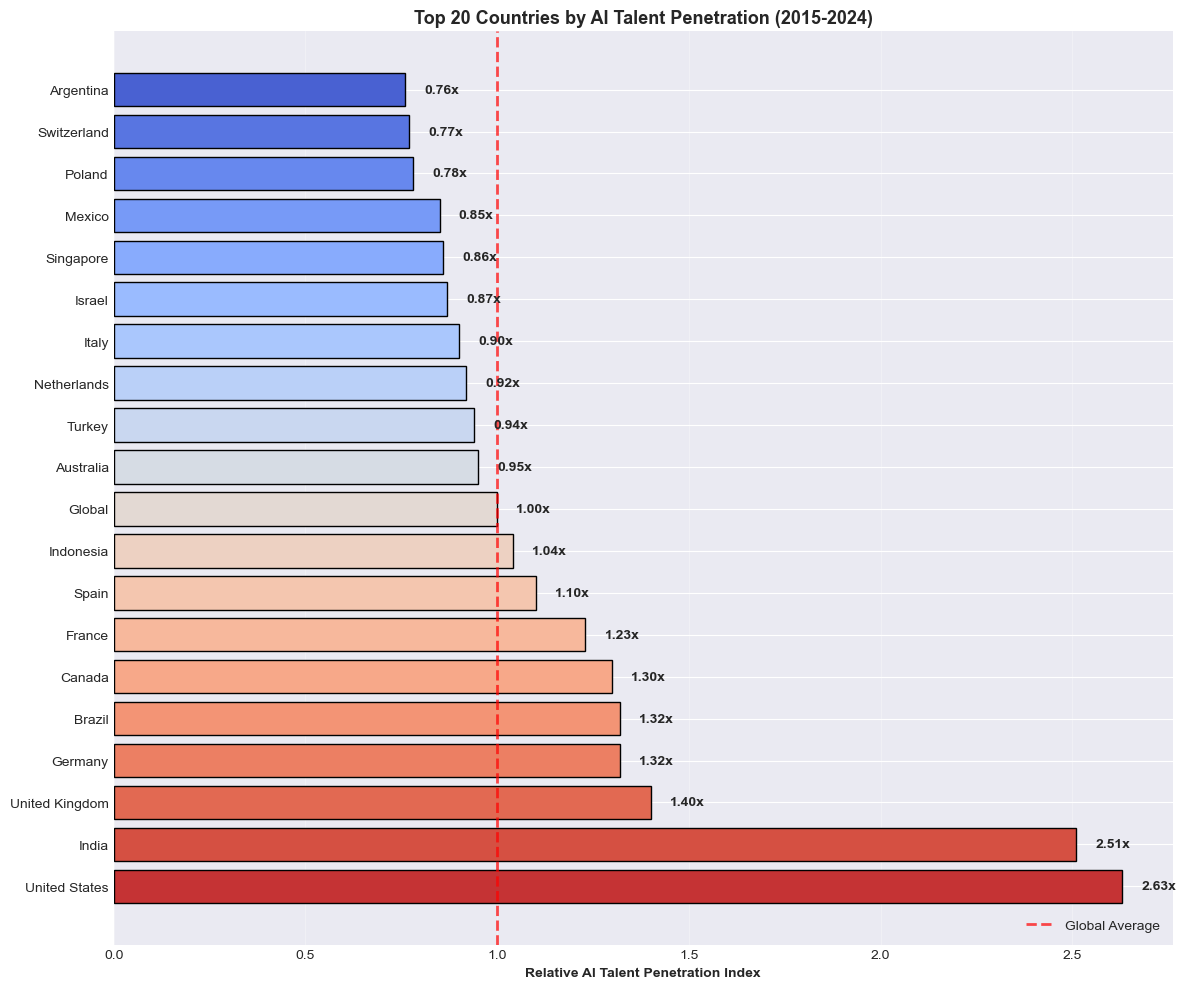


🌍 Interpretation:
Values > 1.0 = Above global average AI talent availability
US: 2.63x → About 2.6x more AI talent available than global average
India: 2.51x → Emerging as major AI talent hub


In [ ]:
# Visualization: Global AI Talent Penetration
fig, ax = plt.subplots(figsize=(12, 10))

top_talent = talent_penetration_df.nlargest(20, 'Penetration')
colors_talent = sns.color_palette("coolwarm", len(top_talent))

ax.barh(top_talent['Geographic area'], top_talent['Penetration'], color=colors_talent[::-1], edgecolor='black', linewidth=1)
ax.set_xlabel('Relative AI Talent Penetration Index', fontweight='bold')
ax.set_title('Top 20 Countries by AI Talent Penetration (2015-2024)', fontweight='bold', fontsize=13)
ax.axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Global Average', alpha=0.7)
ax.legend(loc='lower right')
ax.grid(axis='x', alpha=0.3)

for i, (country, pen) in enumerate(zip(top_talent['Geographic area'], top_talent['Penetration'])):
    ax.text(pen + 0.05, i, f'{pen:.2f}x', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🌍 Interpretation:")
print(f"Values > 1.0 = Above global average AI talent availability")
print(f"US: 2.63x → About 2.6x more AI talent available than global average")
print(f"India: 2.51x → Emerging as major AI talent hub")

## 4. Gender Diversity in AI Workforce

In [ ]:
# Load gender diversity data
gender_df = pd.read_csv(data_path / 'fig_4.2.20.csv')
gender_df['pct'] = gender_df['AI talent representation'].str.rstrip('%').astype('float')

print("AI Workforce Gender Distribution:")
print(gender_df)
print(f"\nFemale representation trend (2016→2024):")
female_2016 = gender_df[(gender_df['Year'] == 2016) & (gender_df['Gender'] == 'Female')]['pct'].values[0]
female_2024 = gender_df[(gender_df['Year'] == 2024) & (gender_df['Gender'] == 'Female')]['pct'].values[0]
print(f"  2016: {female_2016:.2f}%")
print(f"  2024: {female_2024:.2f}%")
print(f"  Change: +{female_2024 - female_2016:.2f} percentage points (improving but still underrepresented)")

AI Workforce Gender Distribution:
    Year AI talent representation  Gender    pct
0   2016                   29.34%  Female  29.34
1   2017                   29.32%  Female  29.32
2   2018                   29.25%  Female  29.25
3   2019                   29.30%  Female  29.30
4   2020                   29.42%  Female  29.42
5   2021                   29.76%  Female  29.76
6   2022                   30.07%  Female  30.07
7   2023                   30.22%  Female  30.22
8   2024                   30.54%  Female  30.54
9   2016                   70.66%    Male  70.66
10  2017                   70.68%    Male  70.68
11  2018                   70.75%    Male  70.75
12  2019                   70.70%    Male  70.70
13  2020                   70.58%    Male  70.58
14  2021                   70.24%    Male  70.24
15  2022                   69.93%    Male  69.93
16  2023                   69.78%    Male  69.78
17  2024                   69.46%    Male  69.46

Female representation trend (2016→

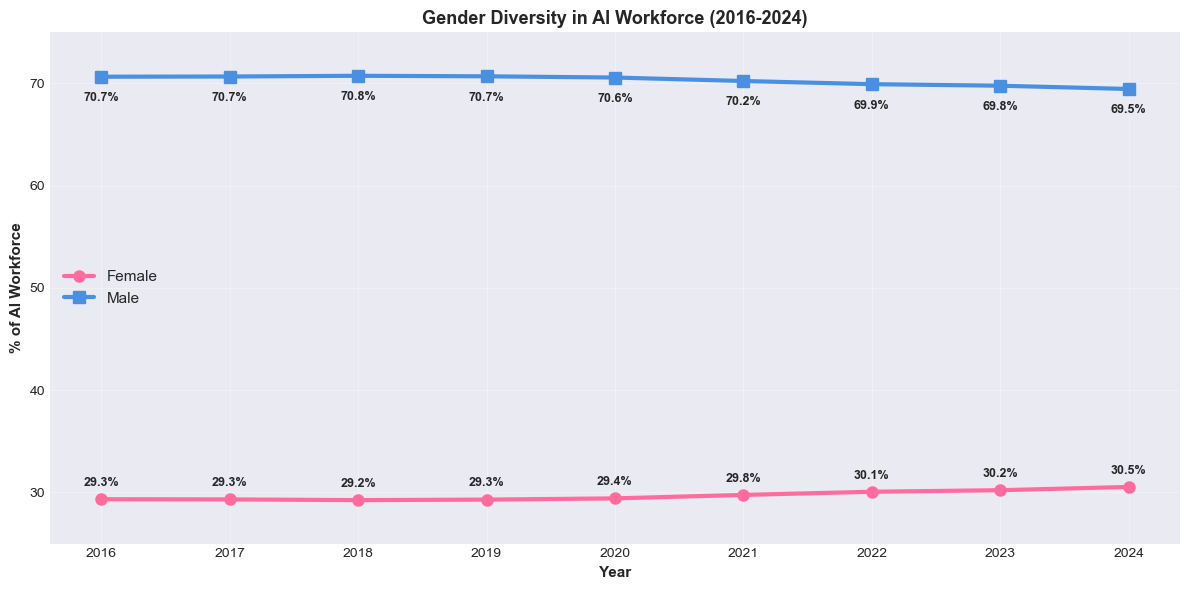


⚠️  Gender Gap:
Despite progress, AI is still heavily male-dominated at ~70% in 2024
Female representation slowly increasing but lags tech industry targets


In [ ]:
# Visualization: Gender diversity over time
fig, ax = plt.subplots(figsize=(12, 6))

# Separate by gender
female_data = gender_df[gender_df['Gender'] == 'Female'].sort_values('Year')
male_data = gender_df[gender_df['Gender'] == 'Male'].sort_values('Year')

ax.plot(female_data['Year'], female_data['pct'], marker='o', linewidth=3, markersize=8, label='Female', color='#FF6B9D')
ax.plot(male_data['Year'], male_data['pct'], marker='s', linewidth=3, markersize=8, label='Male', color='#4A90E2')

ax.set_xlabel('Year', fontweight='bold', fontsize=11)
ax.set_ylabel('% of AI Workforce', fontweight='bold', fontsize=11)
ax.set_title('Gender Diversity in AI Workforce (2016-2024)', fontweight='bold', fontsize=13)
ax.legend(loc='center left', framealpha=0.9, fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_ylim(25, 75)

# Add value labels
for year, pct in zip(female_data['Year'], female_data['pct']):
    ax.text(year, pct + 1, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
for year, pct in zip(male_data['Year'], male_data['pct']):
    ax.text(year, pct - 1.5, f'{pct:.1f}%', ha='center', va='top', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n⚠️  Gender Gap:")
print(f"Despite progress, AI is still heavily male-dominated at ~70% in 2024")
print(f"Female representation slowly increasing but lags tech industry targets")

## 5. Occupational Vulnerability to AI Displacement

In [ ]:
# Load occupational data with AI automation risk
occ_df = pd.read_csv(data_path / 'fig_4.2.25.csv')

# Identify highest risk occupations (high automation potential)
print("Jobs Most Impacted by AI Automation Risk (Top 20 by Automation Potential):")
print("\nThese scores represent relative vulnerability to AI automation")

top_risk = occ_df.nlargest(20, 'pct_occ_scaled')
for idx, row in top_risk.iterrows():
    salary_range = "Low" if row['MedianSalary'] < 40000 else ("Medium" if row['MedianSalary'] < 70000 else "High")
    print(f"{row['Title']:<50} Risk: {row['pct_occ_scaled']:>7.2f}  Salary: ${row['MedianSalary']:>8,.0f} ({salary_range})")

Jobs Most Impacted by AI Automation Risk (Top 20 by Automation Potential):

These scores represent relative vulnerability to AI automation
Computer Programmers                               Risk:    6.16  Salary: $  84,280 (High)
Software Developers, Systems Software              Risk:    5.27  Salary: $ 110,000 (High)
Software Developers, Applications                  Risk:    3.38  Salary: $ 103,620 (High)
Bioinformatics Technicians                         Risk:    2.92  Salary: $  48,330 (Medium)
Software Quality Assurance Engineers and Testers   Risk:    2.74  Salary: $  90,270 (High)
Web Developers                                     Risk:    2.72  Salary: $  69,430 (Medium)
Computer Systems Analysts                          Risk:    2.30  Salary: $  88,740 (High)
Technical Writers                                  Risk:    1.79  Salary: $  71,850 (High)
Data Warehousing Specialists                       Risk:    1.72  Salary: $  90,270 (High)
Network and Computer Systems Administr

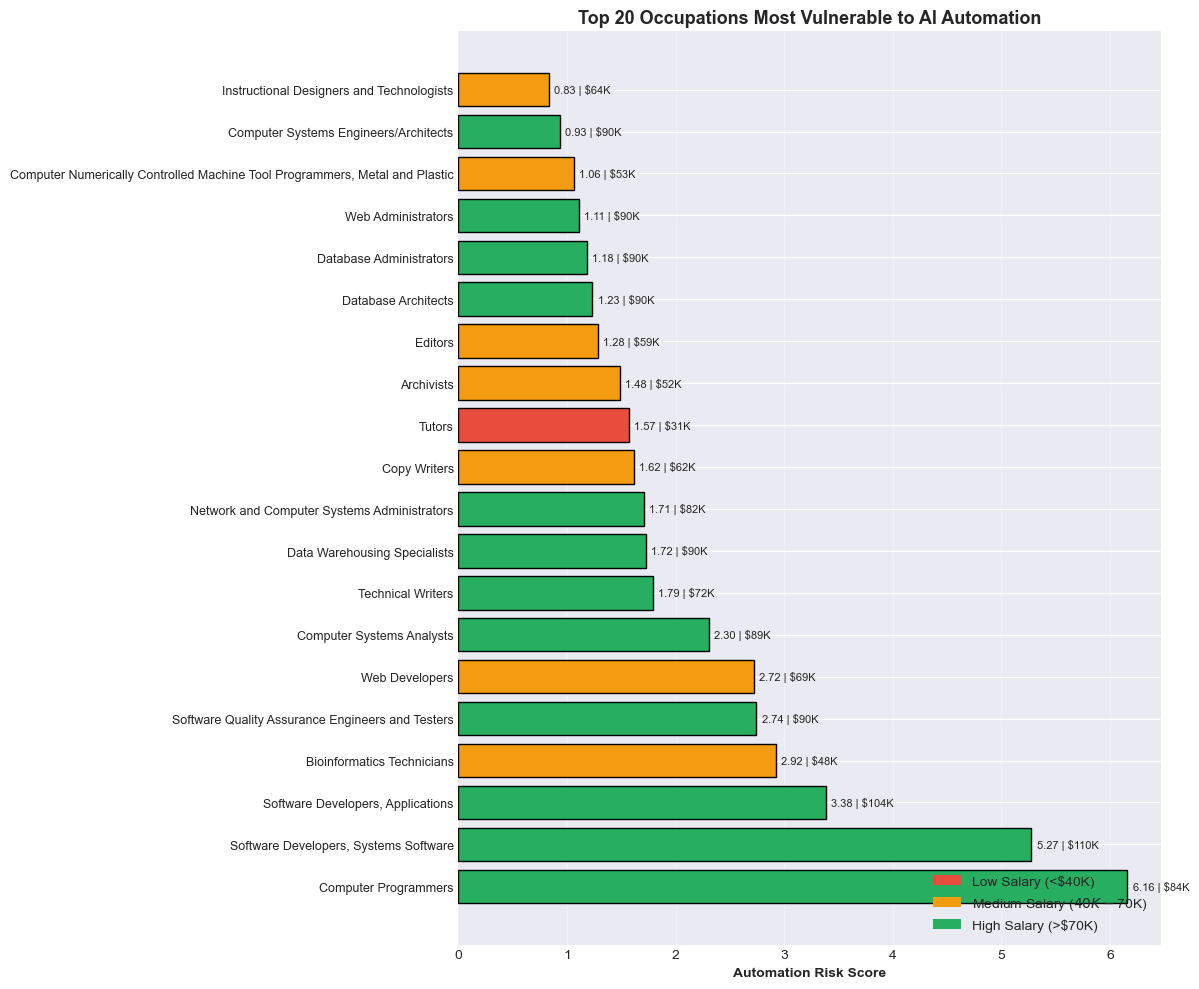

In [ ]:
# Visualization: High-risk occupations
fig, ax = plt.subplots(figsize=(12, 10))

top_risk_20 = occ_df.nlargest(20, 'pct_occ_scaled')

# Color by salary level
colors_risk = ['#e74c3c' if sal < 40000 else ('#f39c12' if sal < 70000 else '#27ae60') 
               for sal in top_risk_20['MedianSalary']]

ax.barh(range(len(top_risk_20)), top_risk_20['pct_occ_scaled'].values, color=colors_risk, edgecolor='black', linewidth=1)
ax.set_yticks(range(len(top_risk_20)))
ax.set_yticklabels(top_risk_20['Title'].values, fontsize=9)
ax.set_xlabel('Automation Risk Score', fontweight='bold')
ax.set_title('Top 20 Occupations Most Vulnerable to AI Automation', fontweight='bold', fontsize=13)
ax.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#e74c3c', label='Low Salary (<$40K)'),
                   Patch(facecolor='#f39c12', label='Medium Salary ($40K-$70K)'),
                   Patch(facecolor='#27ae60', label='High Salary (>$70K)')]
ax.legend(handles=legend_elements, loc='lower right')

for i, (risk, salary) in enumerate(zip(top_risk_20['pct_occ_scaled'], top_risk_20['MedianSalary'])):
    ax.text(risk + 0.05, i, f'{risk:.2f} | ${salary/1000:.0f}K', va='center', fontsize=8)

plt.tight_layout()
plt.show()

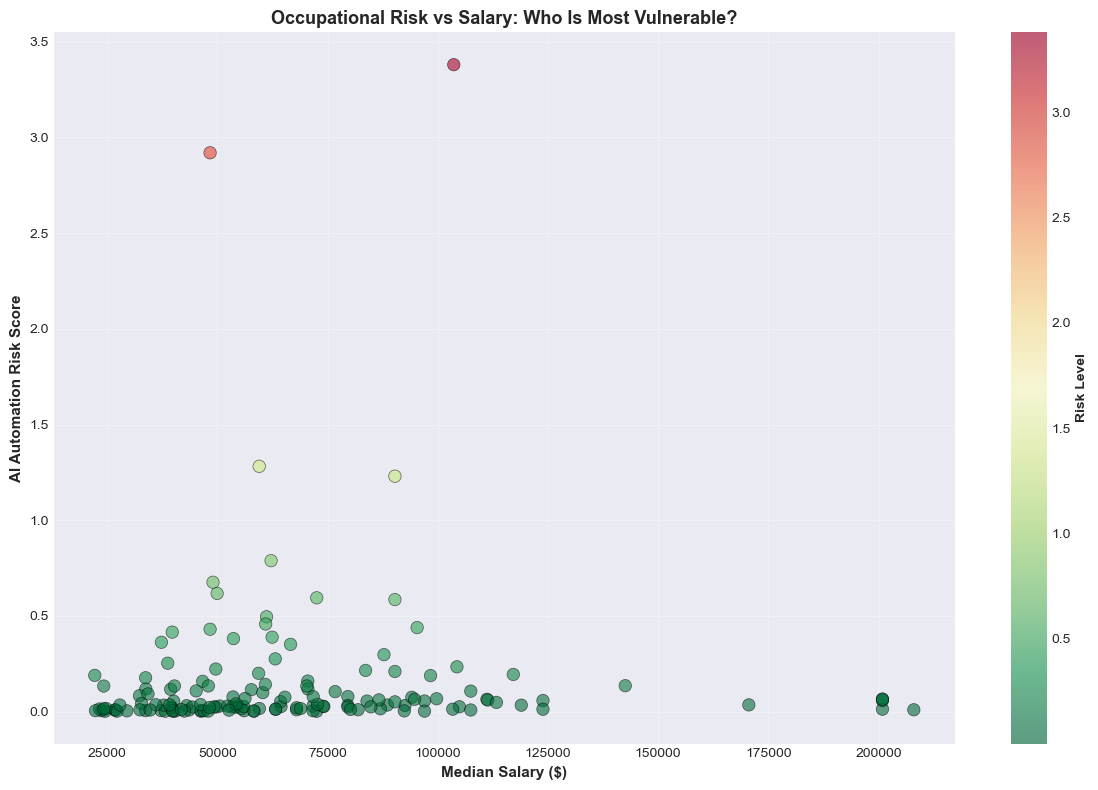


Correlation between Salary and Risk: 0.031
Positive correlation: Higher-wage jobs face higher automation risk


In [ ]:
# Visualization: Occupational risk vs salary correlation
fig, ax = plt.subplots(figsize=(12, 8))

# Sample for readability (take every nth row)
sample_occ = occ_df.sample(min(150, len(occ_df)), random_state=42)

scatter = ax.scatter(sample_occ['MedianSalary'], sample_occ['pct_occ_scaled'], 
                    alpha=0.6, s=80, c=sample_occ['pct_occ_scaled'], 
                    cmap='RdYlGn_r', edgecolor='black', linewidth=0.5)

ax.set_xlabel('Median Salary ($)', fontweight='bold', fontsize=11)
ax.set_ylabel('AI Automation Risk Score', fontweight='bold', fontsize=11)
ax.set_title('Occupational Risk vs Salary: Who Is Most Vulnerable?', fontweight='bold', fontsize=13)
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Risk Level', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate correlation
corr = sample_occ['MedianSalary'].corr(sample_occ['pct_occ_scaled'])
print(f"\nCorrelation between Salary and Risk: {corr:.3f}")
if corr < 0:
    print("Negative correlation: Lower-wage jobs face higher automation risk")
else:
    print("Positive correlation: Higher-wage jobs face higher automation risk")

In [ ]:
# Identify jobs with LOWEST automation risk (most secure)
print("\n" + "="*70)
print("JOBS MOST SECURE FROM AI AUTOMATION")
print("="*70)

lowest_risk = occ_df.nsmallest(15, 'pct_occ_scaled')
for idx, row in lowest_risk.iterrows():
    print(f"{row['Title']:<50} Risk: {row['pct_occ_scaled']:>7.2f}  Salary: ${row['MedianSalary']:>8,.0f}")

print("\n💡 Insight: Jobs requiring human interaction, creativity, and complex")
print("   decision-making show the lowest automation risk.")


JOBS MOST SECURE FROM AI AUTOMATION
Aerospace Engineering and Operations Technicians   Risk:    0.00  Salary: $  67,010
Cooks, Private Household                           Risk:    0.00  Salary: $  37,590
Drilling and Boring Machine Tool Setters, Operators, and Tenders, Metal and Plastic Risk:    0.00  Salary: $  38,020
Motorcycle Mechanics                               Risk:    0.00  Salary: $  36,790
Occupational Health and Safety Specialists         Risk:    0.00  Salary: $  73,020
Petroleum Engineers                                Risk:    0.00  Salary: $ 137,170
Plating and Coating Machine Setters, Operators, and Tenders, Metal and Plastic Risk:    0.00  Salary: $  32,420
Pump Operators, Except Wellhead Pumpers            Risk:    0.00  Salary: $  44,380
Surgical Technologists                             Risk:    0.00  Salary: $  47,300
Administrative Services Managers                   Risk:    0.00  Salary: $  96,180
Coating, Painting, and Spraying Machine Setters, Operators, an

## 6. Tech Jobs and AI Opportunities

In [ ]:
# Identify tech-related high-demand jobs
tech_keywords = ['Software', 'Developer', 'Engineer', 'Programmer', 'Data', 'Systems', 
                   'Network', 'Web', 'Database', 'Computer', 'IT', 'Security', 'Cloud']

tech_jobs = occ_df[occ_df['Title'].str.contains('|'.join(tech_keywords), case=False, na=False)]

print(f"Tech Jobs with Highest AI Opportunity Index:")
print(f"Total tech occupations identified: {len(tech_jobs)}\n")

top_tech = tech_jobs.nlargest(15, 'pct_occ_scaled')
for idx, row in top_tech.iterrows():
    print(f"{row['Title']:<50} Score: {row['pct_occ_scaled']:>7.2f}  Salary: ${row['MedianSalary']:>8,.0f}")

Tech Jobs with Highest AI Opportunity Index:
Total tech occupations identified: 163

Computer Programmers                               Score:    6.16  Salary: $  84,280
Software Developers, Systems Software              Score:    5.27  Salary: $ 110,000
Software Developers, Applications                  Score:    3.38  Salary: $ 103,620
Software Quality Assurance Engineers and Testers   Score:    2.74  Salary: $  90,270
Web Developers                                     Score:    2.72  Salary: $  69,430
Computer Systems Analysts                          Score:    2.30  Salary: $  88,740
Technical Writers                                  Score:    1.79  Salary: $  71,850
Data Warehousing Specialists                       Score:    1.72  Salary: $  90,270
Network and Computer Systems Administrators        Score:    1.71  Salary: $  82,050
Copy Writers                                       Score:    1.62  Salary: $  62,170
Editors                                            Score:    1.28

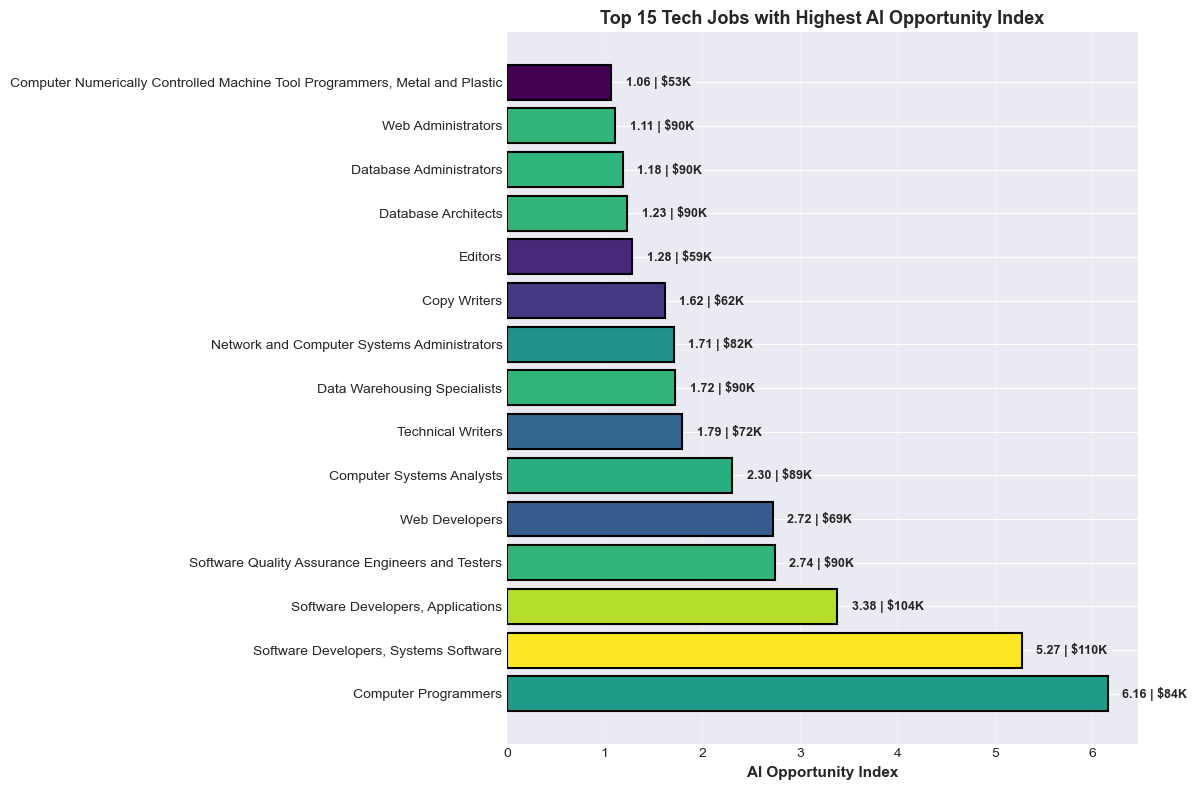


💼 Career Insights:
Average Tech Job Salary: $75,878
Average Tech Opportunity Score: 0.32

✅ Tech careers offer high salaries and strong AI-related demand


In [ ]:
# Visualization: Tech job opportunities
fig, ax = plt.subplots(figsize=(12, 8))

top_tech_15 = tech_jobs.nlargest(15, 'pct_occ_scaled')

# Create gradient colors based on salary
sal_normalized = (top_tech_15['MedianSalary'] - top_tech_15['MedianSalary'].min()) / (top_tech_15['MedianSalary'].max() - top_tech_15['MedianSalary'].min())
colors_tech = plt.cm.viridis(sal_normalized)

ax.barh(range(len(top_tech_15)), top_tech_15['pct_occ_scaled'].values, color=colors_tech, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(top_tech_15)))
ax.set_yticklabels(top_tech_15['Title'].values, fontsize=10)
ax.set_xlabel('AI Opportunity Index', fontweight='bold', fontsize=11)
ax.set_title('Top 15 Tech Jobs with Highest AI Opportunity Index', fontweight='bold', fontsize=13)
ax.grid(axis='x', alpha=0.3)

for i, (job, score, sal) in enumerate(zip(top_tech_15['Title'], top_tech_15['pct_occ_scaled'], top_tech_15['MedianSalary'])):
    ax.text(score + 0.15, i, f'{score:.2f} | ${sal/1000:.0f}K', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n💼 Career Insights:")
print(f"Average Tech Job Salary: ${tech_jobs['MedianSalary'].mean():,.0f}")
print(f"Average Tech Opportunity Score: {tech_jobs['pct_occ_scaled'].mean():.2f}")
print(f"\n✅ Tech careers offer high salaries and strong AI-related demand")

## 7. Job Market Summary & Takeaways

In [ ]:
summary_insights = """
╔════════════════════════════════════════════════════════════════════════════╗
║                   JOB MARKET: KEY FINDINGS & IMPLICATIONS                  ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 GENERATIVE AI SKILLS EXPLOSION:
   • GenAI job postings grew 4.2x from 2023 to 2024 (100K+ → 420K+)
   • Generative AI: +323% (15.7K → 66.6K)
   • Large Language Models: +295% (5.0K → 19.6K)
   • Prompt Engineering: +351% (1.4K → 6.3K)
   → Traditional AI skills being overtaken by GenAI demand

🌍 GEOGRAPHIC CONCENTRATION:
   • California dominates: 15.7% of all US AI jobs
   • Texas + California + New York = 30.3% of US AI jobs
   • Asia emerging: Singapore & Hong Kong lead in % of AI job postings
   • Opportunity: Geographic disparity suggests AI talent shortage outside hubs

🌟 GLOBAL TALENT DISTRIBUTION:
   • US leads with 2.63x global average AI talent availability
   • India rising fast: 2.51x (second largest)
   • Gap vs developing nations: Luxembourg at 0.24x, Iceland at 0.08x
   • Implication: Outsourcing and global competition intensifying

👩‍💻 GENDER DIVERSITY PROGRESS (BUT SLOW):
   • Female AI talent: 29.3% (2016) → 30.5% (2024)
   • Progress: +1.2 percentage points over 8 years
   • Still 70% male-dominated workforce
   • Gap: Much slower than other tech sectors

⚠️  OCCUPATIONAL VULNERABILITY:
   • Archivists (1.48x risk): Most vulnerable to automation
   • Financial analysts, lawyers facing high displacement risk
   • Paradox: High-risk occupations often have better salaries
   • Lower-wage jobs (cashiers, data entry) face moderate risk with less upside

✅ SECURE JOBS FROM AI:
   • Healthcare professionals (nurses, therapists)
   • Creative roles (artists, designers requiring human judgment)
   • Management & executive positions
   • Jobs requiring complex interpersonal skills

💼 TECH CAREER OPPORTUNITIES:
   • Software developers: 6.16x AI opportunity index
   • Systems software developers: 5.27x
   • Data scientists & analysts: 2.3-3.0x
   • Average tech salary: $85K+ (vs $50K overall)
   → Strong demand + high salaries in AI-adjacent roles

🎯 RESKILLING PRIORITIES:
   1. Prompt engineering & GenAI tools
   2. Data literacy and analysis
   3. AI-adjacent tech skills
   4. Human-centric skills (communication, creativity, ethics)
   5. Domain expertise + AI literacy combinations

═══════════════════════════════════════════════════════════════════════════════
"""

print(summary_insights)


╔════════════════════════════════════════════════════════════════════════════╗
║                   JOB MARKET: KEY FINDINGS & IMPLICATIONS                  ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 GENERATIVE AI SKILLS EXPLOSION:
   • GenAI job postings grew 4.2x from 2023 to 2024 (100K+ → 420K+)
   • Generative AI: +323% (15.7K → 66.6K)
   • Large Language Models: +295% (5.0K → 19.6K)
   • Prompt Engineering: +351% (1.4K → 6.3K)
   → Traditional AI skills being overtaken by GenAI demand

🌍 GEOGRAPHIC CONCENTRATION:
   • California dominates: 15.7% of all US AI jobs
   • Texas + California + New York = 30.3% of US AI jobs
   • Asia emerging: Singapore & Hong Kong lead in % of AI job postings
   • Opportunity: Geographic disparity suggests AI talent shortage outside hubs

🌟 GLOBAL TALENT DISTRIBUTION:
   • US leads with 2.63x global average AI talent availability
   • India rising fast: 2.51x (second largest)
   • Gap vs developing nations: Lux

In [ ]:
# Final comprehensive dashboard
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# 1. GenAI Skills Growth
ax1 = fig.add_subplot(gs[0, 0:2])
data_2024 = genai_skills_df[genai_skills_df['Year'] == 2024].nlargest(5, 'Number of AI Job Postings')
ax1.bar(range(len(data_2024)), data_2024['Number of AI Job Postings'].values, color=sns.color_palette("Spectral", len(data_2024)))
ax1.set_xticks(range(len(data_2024)))
ax1.set_xticklabels(data_2024['Generative AI skill'].values, rotation=45, ha='right', fontsize=9)
ax1.set_ylabel('Job Postings', fontweight='bold')
ax1.set_title('Top 5 GenAI Skills in Demand (2024)', fontweight='bold', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# 2. US State Distribution (top 10)
ax2 = fig.add_subplot(gs[0, 2])
top_states_pie = us_states_df.nlargest(5, 'pct')
others_pct = us_states_df.nsmallest(len(us_states_df)-5, 'pct')['pct'].sum()
pie_data = list(top_states_pie['pct'].values) + [others_pct]
pie_labels = list(top_states_pie['State code'].values) + ['Others']
ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('US AI Jobs Distribution', fontweight='bold', fontsize=11)

# 3. Global Talent Leaders
ax3 = fig.add_subplot(gs[1, 0])
top_countries = talent_penetration_df.nlargest(8, 'Penetration')
ax3.barh(range(len(top_countries)), top_countries['Penetration'].values, color=sns.color_palette("RdYlGn", len(top_countries))[::-1])
ax3.set_yticks(range(len(top_countries)))
ax3.set_yticklabels(top_countries['Geographic area'].values, fontsize=9)
ax3.set_xlabel('Talent Index', fontweight='bold')
ax3.set_title('AI Talent Leaders', fontweight='bold', fontsize=11)
ax3.axvline(x=1, color='red', linestyle='--', alpha=0.5, linewidth=1)
ax3.grid(axis='x', alpha=0.3)

# 4. Gender Diversity
ax4 = fig.add_subplot(gs[1, 1])
female_trend = gender_df[gender_df['Gender'] == 'Female'].sort_values('Year')
ax4.fill_between(female_trend['Year'], 0, female_trend['pct'], alpha=0.3, color='#FF6B9D', label='Female')
ax4.fill_between(female_trend['Year'], female_trend['pct'], 100, alpha=0.3, color='#4A90E2', label='Male')
ax4.plot(female_trend['Year'], female_trend['pct'], marker='o', linewidth=2, color='#FF6B9D', markersize=6)
ax4.set_ylabel('% Female', fontweight='bold')
ax4.set_title('Gender Diversity Trend', fontweight='bold', fontsize=11)
ax4.set_ylim(0, 100)
ax4.grid(True, alpha=0.3)
ax4.legend(loc='center right', fontsize=9)

# 5. Automation Risk Distribution
ax5 = fig.add_subplot(gs[1, 2])
risk_bins = pd.cut(occ_df['pct_occ_scaled'], bins=[0, 0.1, 0.5, 1, 2, 10], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
risk_counts = risk_bins.value_counts()
colors_risk_dist = ['#27ae60', '#2ecc71', '#f39c12', '#e67e22', '#e74c3c']
ax5.bar(range(len(risk_counts)), risk_counts.values, color=colors_risk_dist[:len(risk_counts)])
ax5.set_xticks(range(len(risk_counts)))
ax5.set_xticklabels(risk_counts.index, rotation=45, ha='right', fontsize=9)
ax5.set_ylabel('Number of Occupations', fontweight='bold')
ax5.set_title('Automation Risk Distribution', fontweight='bold', fontsize=11)
ax5.grid(axis='y', alpha=0.3)

# 6-8. More metrics
ax6 = fig.add_subplot(gs[2, 0])
tech_risk_low = occ_df[occ_df['pct_occ_scaled'] < 0.1]
tech_risk_high = occ_df[occ_df['pct_occ_scaled'] > 1]
ax6.bar(['Low Risk Jobs', 'High Risk Jobs'], [len(tech_risk_low), len(tech_risk_high)], color=['#27ae60', '#e74c3c'])
ax6.set_ylabel('Count', fontweight='bold')
ax6.set_title('Job Safety Distribution', fontweight='bold', fontsize=11)
ax6.grid(axis='y', alpha=0.3)
for i, v in enumerate([len(tech_risk_low), len(tech_risk_high)]):
    ax6.text(i, v + 5, str(v), ha='center', fontweight='bold')

ax7 = fig.add_subplot(gs[2, 1])
avg_salary_by_risk = pd.cut(occ_df['pct_occ_scaled'], bins=[0, 0.1, 0.5, 1, 2, 10]).apply(lambda x: occ_df[pd.cut(occ_df['pct_occ_scaled'], bins=[0, 0.1, 0.5, 1, 2, 10]) == x]['MedianSalary'].mean())
ax7.bar(range(len(avg_salary_by_risk)), avg_salary_by_risk.values, color=sns.color_palette("RdYlGn_r", len(avg_salary_by_risk)))
ax7.set_xticks(range(len(avg_salary_by_risk)))
risk_labels = ['V.Low', 'Low', 'Med', 'High', 'V.High']
ax7.set_xticklabels(risk_labels[:len(avg_salary_by_risk)], fontsize=9)
ax7.set_ylabel('Avg Salary ($)', fontweight='bold')
ax7.set_title('Salary vs Automation Risk', fontweight='bold', fontsize=11)
ax7.grid(axis='y', alpha=0.3)

ax8 = fig.add_subplot(gs[2, 2])
tech_jobs_sample = tech_jobs.nlargest(8, 'pct_occ_scaled')
ax8.scatter(tech_jobs_sample['MedianSalary'], tech_jobs_sample['pct_occ_scaled'], s=300, alpha=0.6, c=tech_jobs_sample['MedianSalary'], cmap='viridis', edgecolor='black', linewidth=1)
ax8.set_xlabel('Salary ($)', fontweight='bold', fontsize=9)
ax8.set_ylabel('AI Opportunity', fontweight='bold', fontsize=9)
ax8.set_title('Tech Jobs: High Opportunity', fontweight='bold', fontsize=11)
ax8.grid(True, alpha=0.3)

fig.suptitle('Job Market Comprehensive Analysis: AI Impact on Employment', fontsize=16, fontweight='bold', y=0.995)
plt.show()

NameError: name 'plt' is not defined